# Numpy

Erstmal der Import-Befehl wie er sich gehört. Weil wir es mittlerweile können sogar mit Exception-Handling (hier eher zum Spaß)

In [2]:
try:
    import numpy as np
except ImportError: 
    print("numpy nicht verfügbar")

Vergleichen wir erst einmal "normale" Arrays, d.h. Listen mit Numpy-Arrays:

In [4]:
import sys
liste = [float(i) for i in range(0,100000)]
#print(liste)
npliste = np.array(liste)
print(npliste)
print(sys.getsizeof(liste))
print(sys.getsizeof(npliste))

[0.0000e+00 1.0000e+00 2.0000e+00 ... 9.9997e+04 9.9998e+04 9.9999e+04]
800984
800112


Schauen wir uns noch die Schnelligkeit im Vergleich an. Dazu zunächst zwei Exkurse:

Exkurs 1: Mit dem time-Modul kann man Laufzeiten messen:

In [6]:
import time
t1 = time.time()
print(t1)
print(50*365*24*60*60)

1684493849.3202634
1576800000


Die zip-Funktion:
An die zip-Funktion übergibt man zwei "iterables". Die Zip-Funktion verknüpft dann das jewiels das i-te Element zu einem Tupel zusammen. Beispiel:

In [4]:
a = [1, 2, 3]
b = ["A", "B", "C"]
print(tuple(zip(a, b)))

((1, 'A'), (2, 'B'), (3, 'C'))


Versuchen wir nun auf verschiedene Art und Weise die angelegte Liste möglichst schnell zu multiplizieren:

In [7]:
#Erster Versuch: Map-Funktion
def quadrat(x):
    return x*x
t1 = time.time()
summe_1 = list(map(quadrat, liste))
t2 = time.time()
print("Versuch mit map: ", t2-t1)
#zweiter Versuch: 
liste_ergebnis = liste
t1 = time.time()
for i in liste:
    liste_ergebnis = i*i
t2 = time.time()
print("Versuch mit Schleife: ", t2-t1)
#dritter Versuch: zip
t1 = time.time()
liste_zip = [a*b for a,b in zip(liste, liste)]
t2 = time.time()
print("Versuch mit zip: ", t2-t1)

Versuch mit map:  0.0459897518157959
Versuch mit Schleife:  0.03100109100341797
Versuch mit zip:  0.0269927978515625


In [ ]:
Zum Vergleich jetzt mit ndarrays...

In [8]:
t1 = time.time()
np_summe = npliste*npliste
t2 = time.time()
print(np_summe, t2-t1)

[0.00000000e+00 1.00000000e+00 4.00000000e+00 ... 9.99940001e+09
 9.99960000e+09 9.99980000e+09] 0.007004976272583008


In [ ]:
Kommen wir nun zurück zur Matrix-Multiplikation: 

In [11]:
arr_matrix = np.array([[2, 5, 7], [8,9,10], [1,2,3]])
arr_vektor = np.array([2, 4, 5])
#print(arr_matrix, arr_matrix[1, 2], arr_matrix.ndim, arr_vektor, arr_vektor.ndim)
print(np.matmul(arr_matrix, arr_vektor))
print(arr_matrix[0][0])

[ 59 102  25]
2


Im letzten Codeschnipsel verstecken sich ein- bzw. zweidimensionale Numpy-Arrays.

# Scipy

In [14]:
from scipy import constants

#print(dir(constants))
print(constants.find("kilo"))

['atomic mass unit-kilogram relationship', 'electron volt-kilogram relationship', 'hartree-kilogram relationship', 'hertz-kilogram relationship', 'inverse meter-kilogram relationship', 'joule-kilogram relationship', 'kelvin-kilogram relationship', 'kilogram-atomic mass unit relationship', 'kilogram-electron volt relationship', 'kilogram-hartree relationship', 'kilogram-hertz relationship', 'kilogram-inverse meter relationship', 'kilogram-joule relationship', 'kilogram-kelvin relationship']


In [40]:
print(constants.golden_ratio)

1.618033988749895


Schauen wir uns nun an, wie wir mit SciPy Lösungen numerisch bestimmen, die wir analytisch nicht lösen können. Dazu schauen wir uns folgende zwei Funktionen an:

In [4]:
import math
def f1(x):
    return x + math.cos(x)
def f2(x):
    return math.pow(x, 3)+x-1

Damit wir in etwa sehen, wie die Funktionen aussehen, wollen wir diese plotten. Wir erstellen einen Wertebereich, den wir skizzieren wollen. Und: matplotlib betritt die Bühne...

[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01]
[-0.45969769 -0.27839003 -0.10329329  0.06484219  0.22533561  0.37758256
  0.52106099  0.65533649  0.78006658  0.89500417  1.          1.09500417
  1.18006658  1.25533649  1.32106099  1.37758256  1.42533561  1.46484219
  1.49670671  1.52160997]


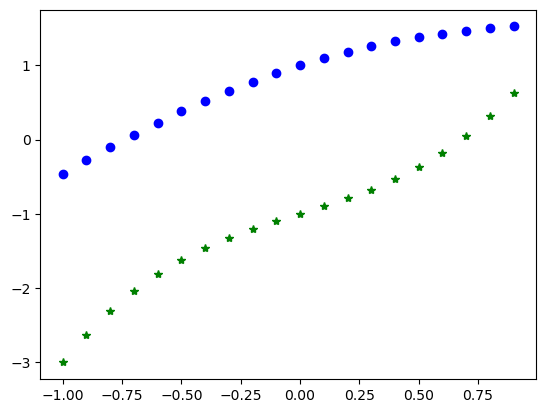

In [7]:
import matplotlib.pyplot as plt
x_werte = np.arange(-1, 1, 0.1)
print(x_werte)
y_werte_1 = np.array([f1(i) for i in x_werte])
print(y_werte_1)
y_werte_2 = np.array([f2(i) for i in x_werte])
plt.plot(x_werte, y_werte_1, 'bo')
plt.plot(x_werte, y_werte_2, 'g*')
plt.show()

Wo sind die Nullstellen der Funktionen? 

In [6]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [9]:
# Wir nutzen die root()-Funktion aus scipy.optimize
import scipy.optimize as opt
#help(opt.root)

Anmerkung: Bei der Nullstellensuche ist der Startpunkt wichtig... (Zweites Argument)

In [11]:
n_f1_1 = opt.root(f1, 0) 
print(n_f1_1)
n_f1_2 = opt.root(f1, 1)
print(n_f1_2)
n_f2_1 = opt.root(f2, 0) 
print(n_f2_1.x)
n_f2_2 = opt.root(f2, 1)
print(n_f2_2.x)

 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00]
       x: [-7.391e-01]
    nfev: 9
    fjac: [[-1.000e+00]]
       r: [-1.674e+00]
     qtf: [-2.668e-13]
 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00]
       x: [-7.391e-01]
    nfev: 11
    fjac: [[-1.000e+00]]
       r: [-1.674e+00]
     qtf: [ 2.578e-13]
[0.6823278]
[0.6823278]


Nutzen wir jetzt die Interpolations-Funktion von Scipy, um eine Funktion zu interpolieren:

In [60]:
#from scipy.interpolate import interp1d
#ich importiere lieber so:
import scipy.interpolate as intp 

def quadrat(x):
    return x*x
x_werte = [i for i in range(0,5)]
y_werte = [quadrat(x) for x in x_werte]
print(x_werte, y_werte)
interp = intp.interp1d(x_werte, y_werte)
print(interp)
interp_x = np.arange(0.1, 3.9, 0.1)
interp_y = interp(interp_x )
print(interp_y, interp_y[0], type(interp_y[0]))

[0, 1, 2, 3, 4] [0, 1, 4, 9, 16]
[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.3  1.6  1.9  2.2
  2.5  2.8  3.1  3.4  3.7  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.
  8.5  9.   9.7 10.4 11.1 11.8 12.5 13.2 13.9 14.6] 0.1 <class 'numpy.float64'>


In [53]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

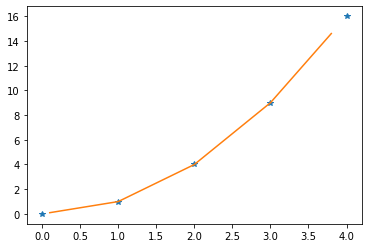

In [61]:
plt.plot(x_werte, y_werte, '*', interp_x, interp_y, '-')
plt.show()

In [64]:
# pandas

In [13]:
import pandas as pd

dataset_1 = {
  'Spalte 1': ["A", "B", "C"],
  'Spalte 2': [1,2,3]
}
print(type(dataset_1))
frame_1 = pd.DataFrame(dataset_1)
print(frame_1, type(frame_1))


<class 'dict'>
  Spalte 1  Spalte 2
0        A         1
1        B         2
2        C         3 <class 'pandas.core.frame.DataFrame'>


Mit Hilfe des loc-Befehls, kann man Zeilen auslesen:

In [66]:
print(frame_1.loc[0], type(frame_1.loc[0]))

Spalte 1    A
Spalte 2    1
Name: 0, dtype: object <class 'pandas.core.frame.DataFrame'>


Steigen wir etwas praktischer ein. Wir sehen dabei ein Problem:

In [76]:
df = pd.read_csv('iris.data')
print(df.to_string())

     5.1  3.5  1.4  0.2      Iris-setosa
0    4.9  3.0  1.4  0.2      Iris-setosa
1    4.7  3.2  1.3  0.2      Iris-setosa
2    4.6  3.1  1.5  0.2      Iris-setosa
3    5.0  3.6  1.4  0.2      Iris-setosa
4    5.4  3.9  1.7  0.4      Iris-setosa
5    4.6  3.4  1.4  0.3      Iris-setosa
6    5.0  3.4  1.5  0.2      Iris-setosa
7    4.4  2.9  1.4  0.2      Iris-setosa
8    4.9  3.1  1.5  0.1      Iris-setosa
9    5.4  3.7  1.5  0.2      Iris-setosa
10   4.8  3.4  1.6  0.2      Iris-setosa
11   4.8  3.0  1.4  0.1      Iris-setosa
12   4.3  3.0  1.1  0.1      Iris-setosa
13   5.8  4.0  1.2  0.2      Iris-setosa
14   5.7  4.4  1.5  0.4      Iris-setosa
15   5.4  3.9  1.3  0.4      Iris-setosa
16   5.1  3.5  1.4  0.3      Iris-setosa
17   5.7  3.8  1.7  0.3      Iris-setosa
18   5.1  3.8  1.5  0.3      Iris-setosa
19   5.4  3.4  1.7  0.2      Iris-setosa
20   5.1  3.7  1.5  0.4      Iris-setosa
21   4.6  3.6  1.0  0.2      Iris-setosa
22   5.1  3.3  1.7  0.5      Iris-setosa
23   4.8  3.4  1

...der Datensatz enthält keine Überschrift. pandas interpretiert dann standardmäßig die erste Zeile als Überschrift. Das umgehen wir wie folgt:

In [16]:
df = pd.read_csv('iris.data', header=None)
#wir hätten das auch importieren oder in der Datei setzen können
spaltennamen = ['Sepal Länge', 'Sepal Breite', 'Petal Länge','Petal Breite', 'Art']
df.columns = spaltennamen
print(df.head(10))
setosa_filter = df["Sepal Länge"] >= 7.9
print(setosa_filter)
print(df[setosa_filter])

   Sepal Länge  Sepal Breite  Petal Länge  Petal Breite          Art
0          5.1           3.5          1.4           0.2  Iris-setosa
1          4.9           3.0          1.4           0.2  Iris-setosa
2          4.7           3.2          1.3           0.2  Iris-setosa
3          4.6           3.1          1.5           0.2  Iris-setosa
4          5.0           3.6          1.4           0.2  Iris-setosa
5          5.4           3.9          1.7           0.4  Iris-setosa
6          4.6           3.4          1.4           0.3  Iris-setosa
7          5.0           3.4          1.5           0.2  Iris-setosa
8          4.4           2.9          1.4           0.2  Iris-setosa
9          4.9           3.1          1.5           0.1  Iris-setosa
0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: Sepal Länge, Length: 150, dtype: bool
     Sepal Länge  Sepal Breite  Petal Länge  Petal Bre

...es gibt unzählige Analyse-Möglichkeiten. Bester Einstieg mit Info:

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Länge   150 non-null    float64
 1   Sepal Breite  150 non-null    float64
 2   Petal Länge   150 non-null    float64
 3   Petal Breite  150 non-null    float64
 4   Art           150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


<AxesSubplot:>

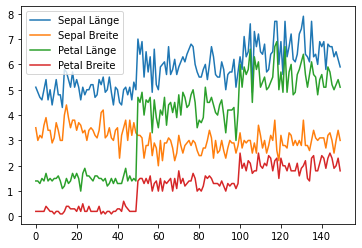

In [85]:
df.plot()